<h1 style="background: linear-gradient(to right, #49A, #0FB); color: white; padding: 20px;">Program 13</h1>

<ol start="13">
    <li>Create a program to carry out a case study on sentiment analysis utilizing Natural Language Processing (NLP). Implement this analysis on a dataset contained in a CSV file named "vaccination_tweets.csv". This dataset consists of tweets related to vaccinations.     
    </li>
</ol>

In [ ]:
pip install textblob

In [ ]:
import pandas as pd
from textblob import TextBlob

# Load the dataset
data = pd.read_csv('vacination_tweets.csv',encoding='latin1')


# Ensure the 'text' column exists and perform sentiment analysis
if 'text' in data.columns:
    data['sentiment'] = data['text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Categorize sentiment as positive, negative, or neutral
data['sentiment_category'] = data['sentiment'].apply(lambda x: 'positive' if x > 0 else 'negative' if x < 0 else 'neutral')

# Save the results to a new CSV
data.to_csv('new_vaccination_tweets.csv', index=False)

print("Sentiment analysis complete. Results saved to 'vaccination_tweets_with_sentiment.csv'.")




Sentiment analysis complete. Results saved to 'vaccination_tweets_with_sentiment.csv'.


In [3]:
data = pd.read_csv('new_vaccination_tweets.csv',encoding='latin1')
print(data.head())

             id                                          user_name  \
0  1.340540e+18                                         Rachel Roh   
1  1.338160e+18                                        Albert Fong   
2  1.337860e+18  eliÂ?ÂÂ??Â?ÂÂ?ÂªÂ?ÂÂ??Â?ÂÂ??Â?ÂÂ...   
3  1.337860e+18                                      Charles Adler   
4  1.337850e+18                               Citizen News Channel   

               user_location  \
0  La Crescenta-Montrose, CA   
1          San Francisco, CA   
2                   Your Bed   
3     Vancouver, BC - Canada   
4                        NaN   

                                    user_description      user_created  \
0  Aggregator of Asian American news; scanning di...  08-04-2009 17:52   
1  Marketing dude, tech geek, heavy metal & '80s ...  21-09-2009 15:27   
2                   heil, hydra Â?ÂÂ??Â?Â«ÂÂ¨Â«  25-06-2020 23:30   
3  Hosting "CharlesAdlerTonight" Global News Radi...  10-09-2008 11:28   
4  Citizen News 

In [ ]:
pip install wordcloud

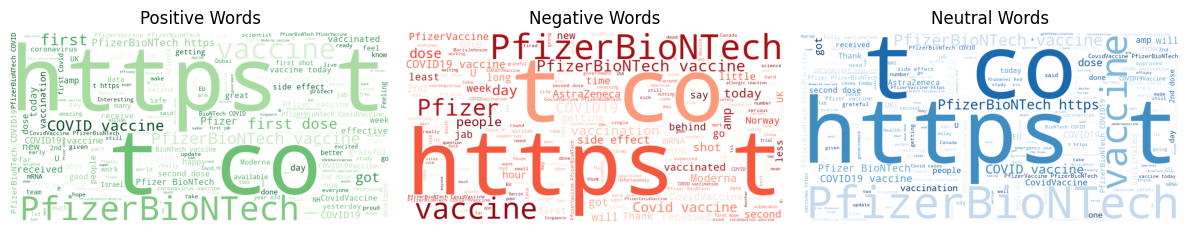

                                                 text sentiment_category
0   Same folks said daikon paste could treat a cyt...            neutral
1   While the world has been on the wrong side of ...           negative
2   #coronavirus #SputnikV #AstraZeneca #PfizerBio...            neutral
3   Facts are immutable, Senator, even when you're...           negative
4   Explain to me again why we need a vaccine @Bor...            neutral
5   Does anyone have any useful advice/guidance fo...           positive
6   it is a bit sad to claim the fame for success ...           negative
7   There have not been many bright days in 2020 b...           positive
8   Covid vaccine; You getting it?\n\n #CovidVacci...            neutral
9   #CovidVaccine \n\nStates will start getting #C...            neutral
10  while deaths are closing in on the 300,000 mar...           positive
11  @cnnbrk #COVID19 #CovidVaccine #vaccine #Coron...           positive
12  The agency also released new information for h.

In [10]:
import pandas as pd
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('vacination_tweets.csv', encoding='latin1')

# Perform sentiment analysis and categorize sentiments
data['sentiment_category'] = data['text'].apply(
    lambda x: 'positive' if TextBlob(str(x)).sentiment.polarity > 0 else 
              'negative' if TextBlob(str(x)).sentiment.polarity < 0 else 'neutral'
)

# Generate word clouds
def generate_wordcloud(category, color):
    text = " ".join(data[data['sentiment_category'] == category]['text'].astype(str))
    return WordCloud(width=800, height=400, background_color='white', colormap=color).generate(text)

positive_wordcloud = generate_wordcloud('positive', 'Greens')
negative_wordcloud = generate_wordcloud('negative', 'Reds')
neutral_wordcloud = generate_wordcloud('neutral', 'Blues')

# Plot word clouds
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1), plt.imshow(positive_wordcloud), plt.axis('off'), plt.title('Positive Words')
plt.subplot(1, 3, 2), plt.imshow(negative_wordcloud), plt.axis('off'), plt.title('Negative Words')
plt.subplot(1, 3, 3), plt.imshow(neutral_wordcloud), plt.axis('off'), plt.title('Neutral Words')
plt.tight_layout()
plt.show()

# Print sentiment analysis results
print(data[['text', 'sentiment_category']].head(20))  # Adjust number as needed

# Print sentiment category counts
print(data['sentiment_category'].value_counts())